### Importing Libraries

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

### Q1. Read the dataset (tab, csv, xls, txt, inbuilt dataset). Do the descriptive statistics and do null value condition check, write an inference on it. 

#### Reading the dataset

In [49]:
data = pd.read_csv("online_shoppers_intention.csv")

#### Checking the shape of the dataset

In [50]:
data.shape

(12330, 18)

#### Displaying first and the last 5 rows of the dataset

In [51]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [52]:
data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


#### Displaying the information of the dataset

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

#### Displaying the descriptive statistics of the dataset

In [54]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### Checking null values in the dataset

In [55]:
data.isnull().sum().sum()

0

As we can infer that the data has no missing/null values. The data has 12330 number of rows and 18 number of columns.
There are 15 integer/float attributes and there are two boolean columns(Revenue and Weekend). Revenue is our target column. The rest of the columns are int/float.

In [56]:
data.Revenue.value_counts()  # Highly Imbalance

False    10422
True      1908
Name: Revenue, dtype: int64

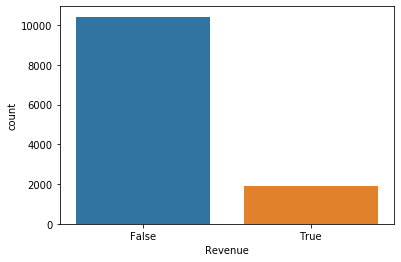

In [57]:
sns.countplot(data.Revenue) # Highly Imbalance

In [ ]:
# Although the classes in the dataset is highly imbalanced, we are not going to apply SMOTE, Over-sampling or Down-sampling as 
# it is a coputationally extensive technique and there is less time frame to execute such codes.

In [58]:
# Converting Boolean data features into Object (1 or 2):
data.Weekend = data.Weekend.astype("int")
data.Revenue = data.Revenue.astype("int")

<Figure size 1080x720 with 0 Axes>

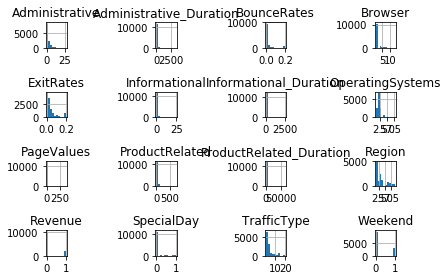

In [227]:
plt.figure(figsize=[15,10])
data.hist()
plt.tight_layout()

### Q2. Apply the scaled data on the K-Means algorithm, identify how many number of clusters is optimized cluster using elbow graph and table which plots error vs number of clusters

#### Dummifying the dataset

In [177]:
# Dropping Revenue (Target Column) for Clustering Questions.
X = data.drop("Revenue",axis=1)
Y = data.Revenue
dummy = pd.get_dummies(X,drop_first=True)

#### Scaling the dataset

In [178]:
SS = StandardScaler()

In [179]:
scaled_data = SS.fit_transform(dummy)

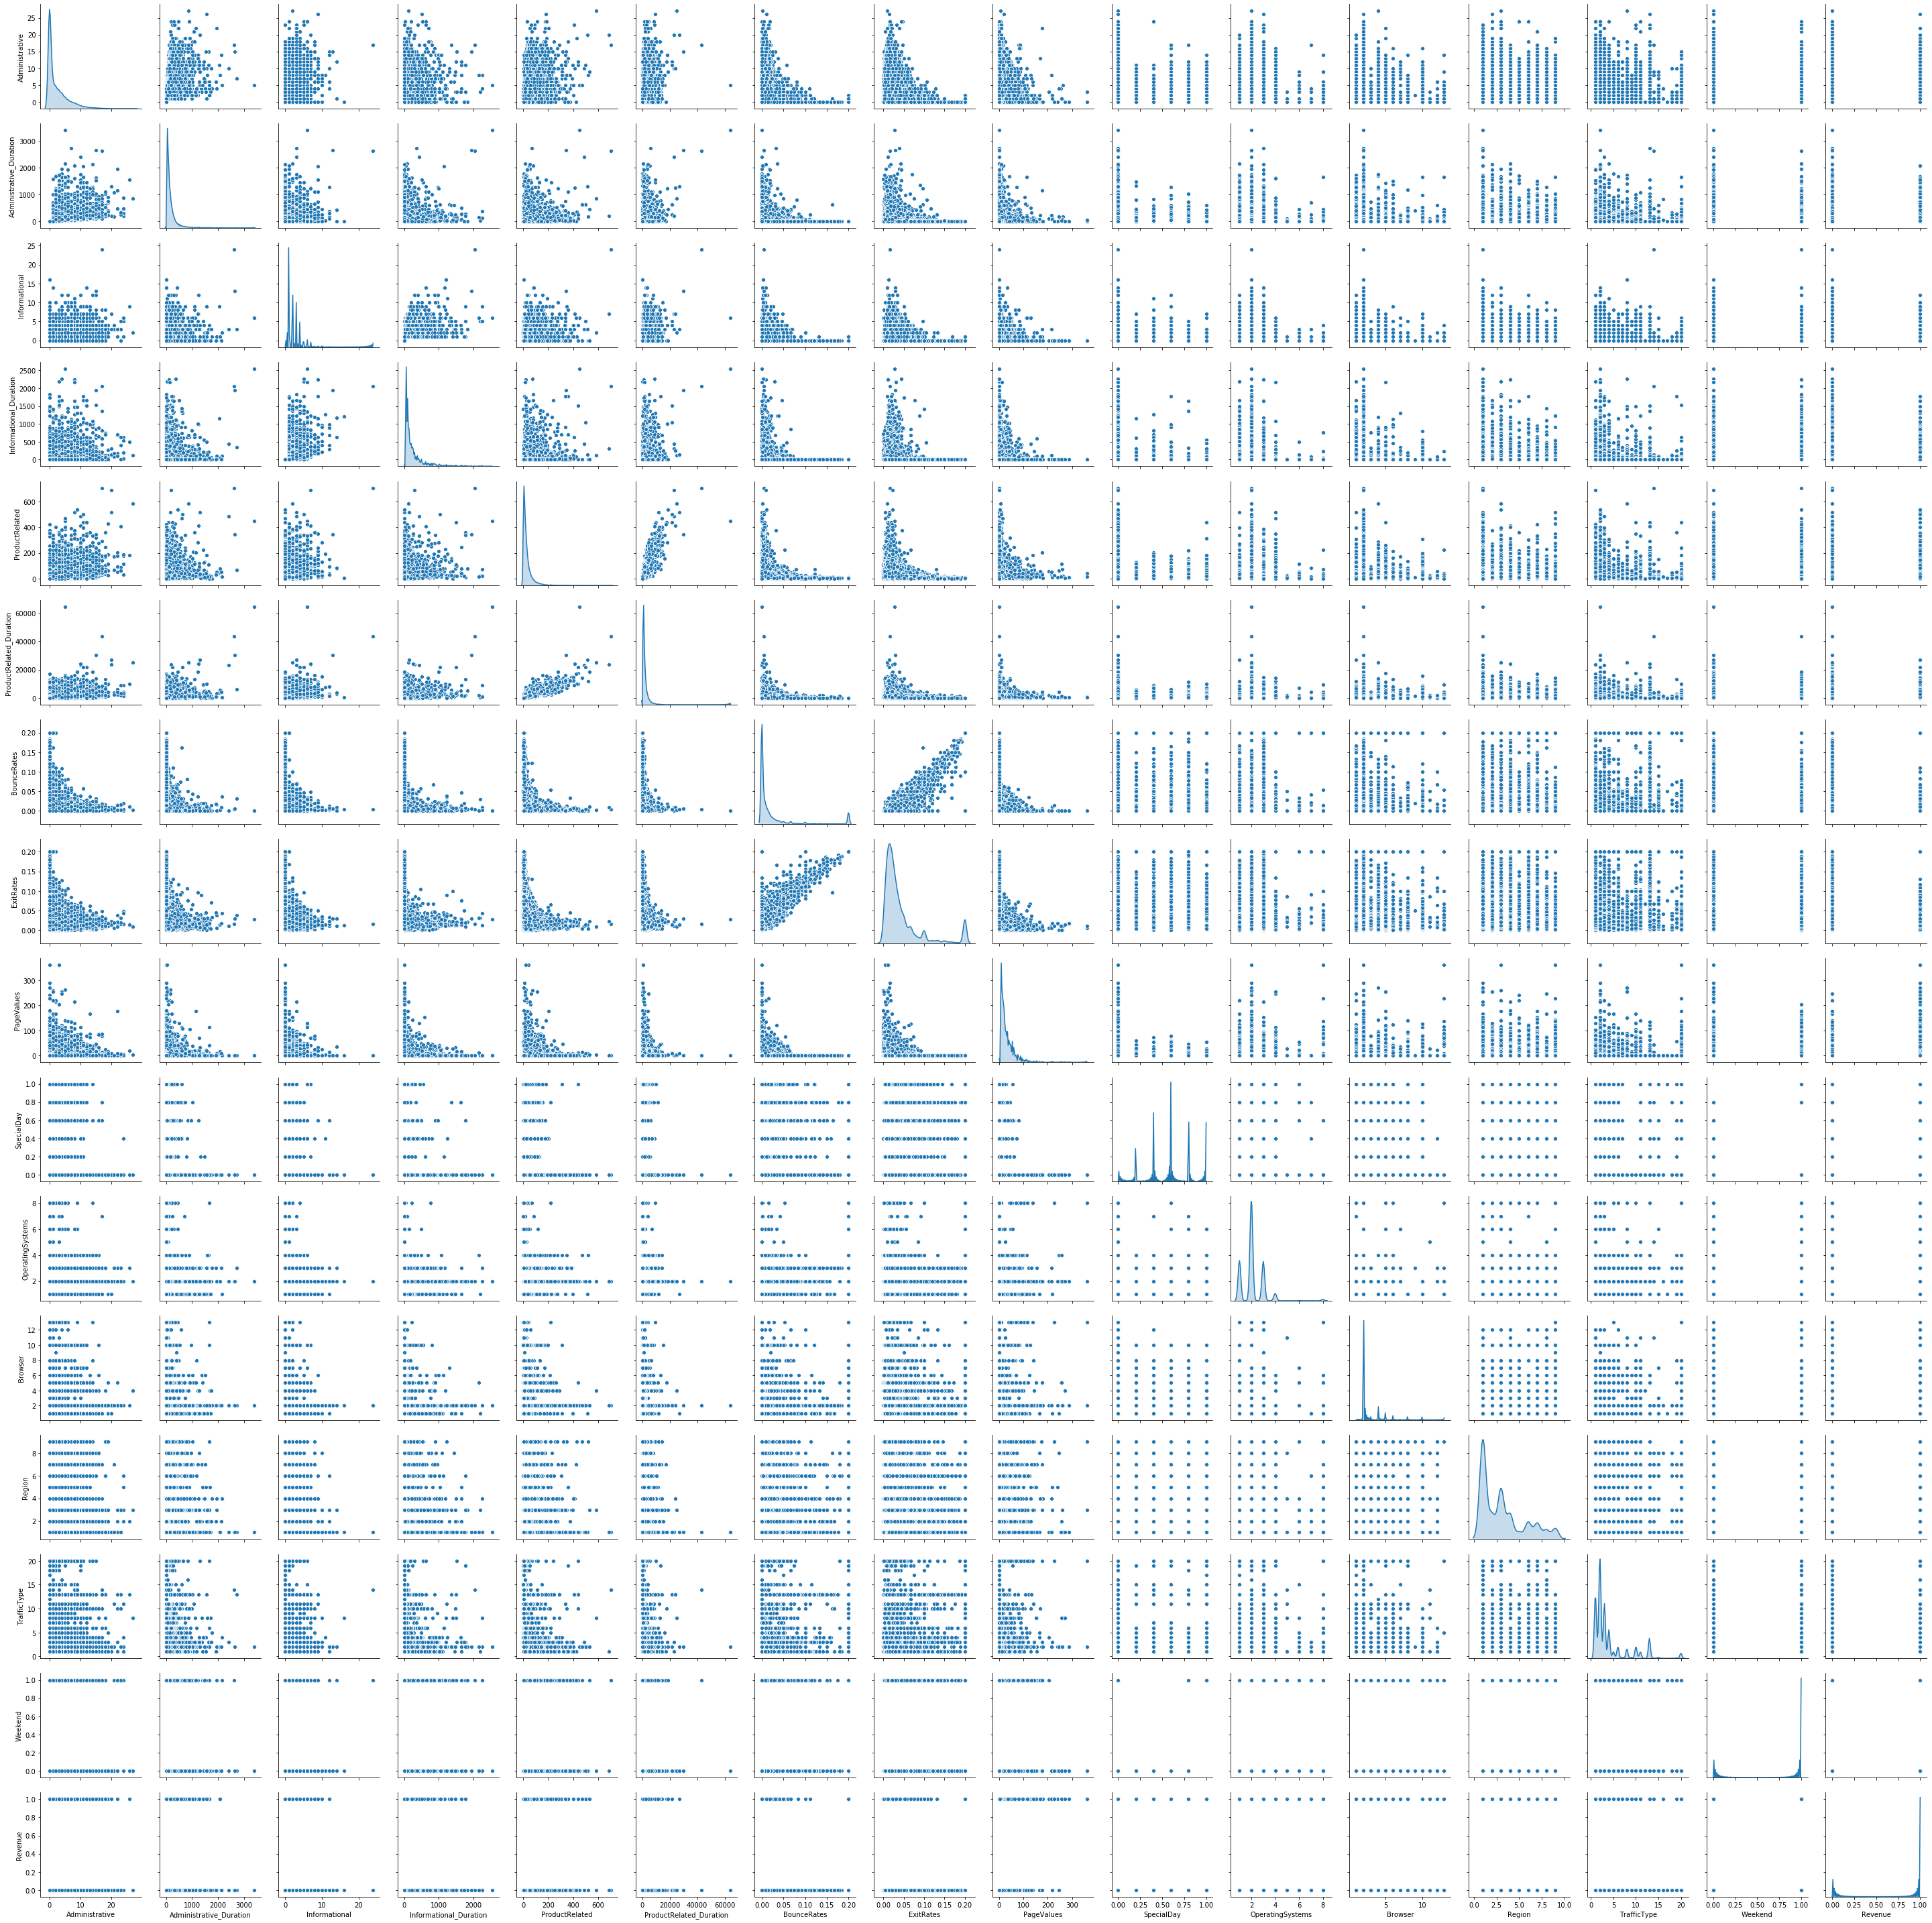

In [10]:
sns.pairplot(data,diag_kind='kde')

Visualisation through pairplot is not helping visualising the clusters in our dataset.

#### Plotting Cluster Errors vs Number of Clusters

In [62]:
# Checking for optimal number of clusters in this dataset-
cluster_range = range( 1, 10)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5,max_iter=100)
    clusters.fit(scaled_data)
    labels = clusters.labels_ # Cluster lables
    centroids = clusters.cluster_centers_ # Centroids
    cluster_errors.append( clusters.inertia_ ) # Intertia
# Making a dataframe of cluster_range and cluster_errors
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[:10]

,num_clusters,cluster_errors
0,1,320580.000000
1,2,296370.191528
2,3,276444.035065
3,4,262339.621672
4,5,249451.489761
5,6,235805.396451
6,7,225819.466254
7,8,212254.457812
8,9,204605.731904


In [63]:
errors = clusters_df['cluster_errors']

In [64]:
for i in range(8):
    print(errors[i+1]-errors[i])

-24209.808472174278
-19926.156463296968
-14104.413392155722
-12888.131911145436
-13646.093310033117
-9985.930197020061
-13565.008441947954
-7648.725908712659


####  Using Elbow Plot to visualise and find the optimal number of clusters

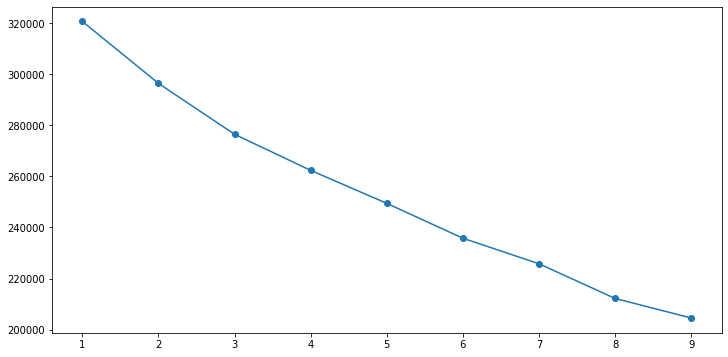

In [65]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df["num_clusters"], clusters_df["cluster_errors"], marker = "o" )

### Q3. Apply the scaled data on the Hierarchical algorithm (Agglomerative clustering), identify how many number of clusters is optimized cluster using dendogram and table which plots error vs number of clusters, write a details inference on it

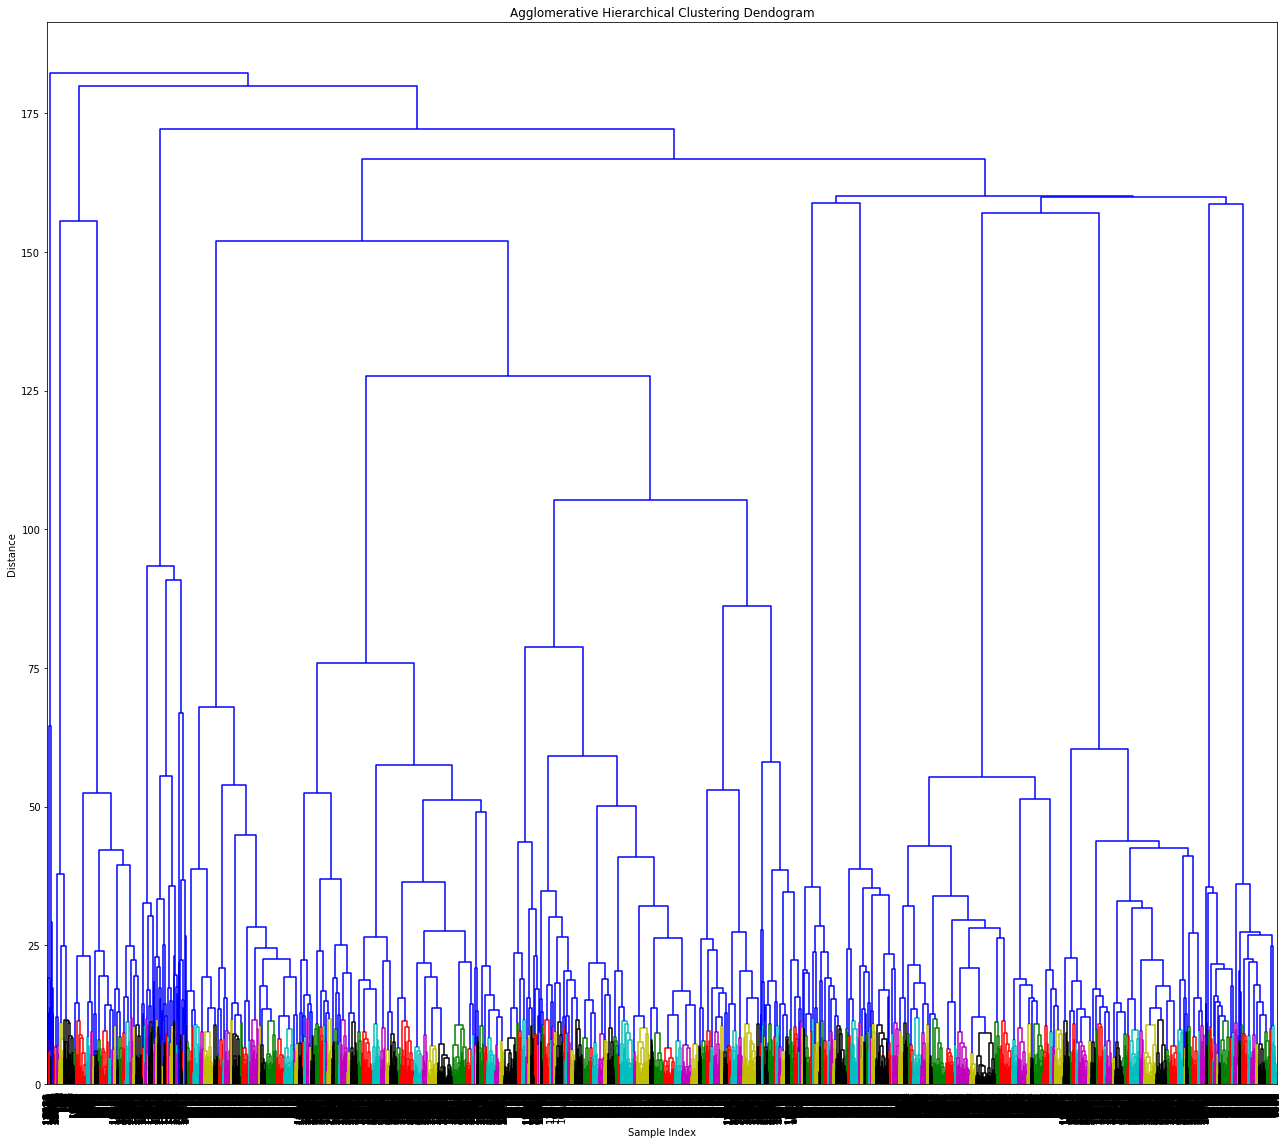

In [225]:
plt.figure(figsize=[18, 16])
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
S = linkage(scaled_data,'ward')
dendrogram(S,leaf_rotation=90.0,p=25,color_threshold=12,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [115]:
AC = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
AC.fit(scaled_data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [116]:
AC.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

In [117]:
labels = pd.DataFrame({"Labels":AC.labels_})

### Q4. Selected the output of K-means/hierarchical cluster either one and bind the data back to the original data, group the data based on the cluster and given an inference

In [159]:
KM = KMeans(n_clusters=3,n_init=10,max_iter=100,random_state=0)

In [160]:
KM.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [161]:
KM.labels_

array([1, 0, 1, ..., 0, 0, 0])

In [162]:
KM_Labels = pd.DataFrame(KM.labels_,columns= list(['Labels']))

In [163]:
KM_Labels.Labels= KM_Labels.Labels.astype('category')

In [164]:
KM_Labels.head()

,Labels
0,1
1,0
2,1
3,1
4,0


In [172]:
scaled_df = pd.DataFrame(scaled_data)

In [173]:
KM_Labeled = pd.concat([scaled_df,KM_Labels],axis=1)

In [175]:
KM_Labeled.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,Labels
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,1
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,1
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.083316,0.410621,0


### Q5. Apply PCA with scaled data and identify the cluster using K-Means and Hierarchical, group the data based on the cluster and given an inference 

In [180]:
scaled_data.shape

(12330, 26)

In [196]:
pca = PCA(n_components=20)
pca_x = pca.fit_transform(scaled_data)

In [197]:
pca_x.shape

(12330, 20)

In [198]:
pca.components_ # These are the eigenvectors

array([[ 3.73640256e-01,  3.18808133e-01,  3.36893580e-01,
         2.85168841e-01,  4.06076174e-01,  4.06000107e-01,
        -2.74506961e-01, -3.21013210e-01,  9.30163114e-02,
        -9.60444933e-02, -1.77525800e-02, -2.33472361e-02,
        -2.13973130e-02, -5.05597292e-02,  3.60572293e-02,
        -3.03756966e-03, -6.26244746e-02,  6.65632993e-03,
        -1.06666098e-02, -4.61737334e-02, -9.49414737e-02,
         1.17754011e-01,  3.98218365e-02,  3.18932007e-02,
        -3.22970202e-02,  3.30290539e-04],
       [-1.05029536e-02, -3.17702306e-02, -1.56807181e-01,
        -1.58659958e-01, -1.40986018e-01, -1.51627850e-01,
        -2.99607407e-01, -3.00068115e-01,  1.82528656e-01,
        -2.76105021e-01,  2.51521105e-01,  2.73290648e-01,
         1.68304592e-01,  1.19844033e-01,  2.88912015e-02,
         2.39332793e-01, -9.41088011e-02, -2.69023769e-03,
        -2.38992630e-02,  3.39986319e-02, -2.82979353e-01,
         3.86937878e-02,  7.19345153e-02,  6.91374813e-02,
         3.67

In [199]:
pca.explained_variance_

array([3.48531708, 1.95879485, 1.78599782, 1.63797085, 1.33084041,
       1.15923886, 1.13688305, 1.09713297, 1.05091484, 1.04481203,
       1.03162057, 0.99446868, 0.97033069, 0.94676487, 0.93687352,
       0.91118109, 0.84142876, 0.78251385, 0.74912388, 0.57580653])

In [201]:
pca.explained_variance_ratio_.cumsum()

array([0.13403978, 0.20937194, 0.27805859, 0.34105236, 0.39223438,
       0.43681687, 0.4805396 , 0.5227336 , 0.56315012, 0.60333194,
       0.64300644, 0.68125213, 0.71856951, 0.75498059, 0.79101127,
       0.82605385, 0.85841387, 0.88850812, 0.91731824, 0.93946285])

In [202]:
pca.explained_variance_ratio_    # Explaining approx 94% of the data with these.

array([0.13403978, 0.07533215, 0.06868665, 0.06299377, 0.05118202,
       0.04458249, 0.04372272, 0.042194  , 0.04041652, 0.04018182,
       0.0396745 , 0.03824569, 0.03731738, 0.03641108, 0.03603067,
       0.03504258, 0.03236002, 0.03009425, 0.02881012, 0.02214461])

### Q6. Split the data into test and train, apply Data without PCA build classification model Logistic regression, KNN, Navies Bayes, Decision Tree and write inference.

In [79]:
dummy = pd.get_dummies(data.drop("Revenue",axis=1),drop_first=True)
X = dummy
Y = data.Revenue
XTRAIN,XTEST,YTRAIN,YTEST = train_test_split(X,Y,random_state=0,test_size=0.2)
print("xtrain shape: ",XTRAIN.shape)
print("xtest shape: ",XTEST.shape)
print("ytrain shape: ",YTRAIN.shape)
print("ytest shape: ",YTEST.shape)

xtrain shape:  (9864, 26)
xtest shape:  (2466, 26)
ytrain shape:  (9864,)
ytest shape:  (2466,)


In [80]:
ss = StandardScaler()

In [81]:
XTRAIN_SCALED = ss.fit_transform(XTRAIN)
XTEST_SCALED = ss.transform(XTEST)

#### Logistic Regression Model

In [82]:
logreg = LogisticRegression()
predict_logreg = logreg.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [83]:
classificationreport = classification_report(YTEST,predict_logreg)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

           0       0.88      0.97      0.93      2044
           1       0.75      0.37      0.50       422

    accuracy                           0.87      2466
   macro avg       0.82      0.67      0.71      2466
weighted avg       0.86      0.87      0.85      2466



In [84]:
accuracy = accuracy_score(YTEST,predict_logreg)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.8710462287104623


In [85]:
confusion_matrix(YTEST,predict_logreg)

array([[1992,   52],
       [ 266,  156]], dtype=int64)

In [86]:
cohen_kappa_score(YTEST,predict_logreg)

0.43093463993474734

#### K-Nearest Neighbors (KNN) Model

In [87]:
knn = KNeighborsClassifier(n_neighbors=5)

In [88]:
predict_knn = knn.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [89]:
classificationreport = classification_report(YTEST,predict_knn)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2044
           1       0.69      0.35      0.47       422

    accuracy                           0.86      2466
   macro avg       0.78      0.66      0.69      2466
weighted avg       0.85      0.86      0.84      2466



In [90]:
accuracy = accuracy_score(YTEST,predict_knn)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.862124898621249


In [91]:
confusion_matrix(YTEST,predict_knn)

array([[1978,   66],
       [ 274,  148]], dtype=int64)

In [92]:
cohen_kappa_score(YTEST,predict_knn)

0.39583213235717996

#### Naive Bayes Model

In [93]:
GNB = GaussianNB()
predict_gnb = GNB.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [94]:
classificationreport = classification_report(YTEST,predict_gnb)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

           0       0.95      0.68      0.79      2044
           1       0.34      0.81      0.48       422

    accuracy                           0.70      2466
   macro avg       0.64      0.75      0.64      2466
weighted avg       0.84      0.70      0.74      2466



In [95]:
accuracy = accuracy_score(YTEST,predict_gnb)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.7043795620437956


In [96]:
confusion_matrix(YTEST,predict_gnb)

array([[1396,  648],
       [  81,  341]], dtype=int64)

In [97]:
cohen_kappa_score(YTEST,predict_gnb)

0.32028614531856736

#### Decision Tree Model

In [98]:
dtc = DecisionTreeClassifier()
predict_dtc = dtc.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [99]:
classificationreport = classification_report(YTEST,predict_dtc)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

           0       0.91      0.92      0.91      2044
           1       0.58      0.54      0.56       422

    accuracy                           0.85      2466
   macro avg       0.74      0.73      0.73      2466
weighted avg       0.85      0.85      0.85      2466



In [100]:
accuracy = accuracy_score(YTEST,predict_dtc)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.8536090835360909


In [101]:
confusion_matrix(YTEST,predict_dtc)

array([[1878,  166],
       [ 195,  227]], dtype=int64)

In [102]:
cohen_kappa_score(YTEST,predict_dtc)

0.4695029730087277

After applying these four models without PCA and printing all the major classification metrics. We can see that the best accuracy score we have achieved among all models is 87.10% by the logistic regression model. Although, the Cohen Kappa Statistic Score is the highest(46.95%) for decision tree. And the accuracy of decision tree is also one of the top ones (85.36%). The Cohen Kappa Score is a measure of how closely the instances classified by the classifier matching the data in the original data. F1 Score is the harmonic mean of recall and precision.

Kappa is an important measure on classifier performance, especially on imbalanced data set.  And our dataset is imbalanced. It measures how much better the classier is, compared to estimating with the distribution of Revenue. It doesn’t matter what kind of distribution it is, it doesn’t show biasness.

So the best model among these would be Decision Tree on the basis of Accuracy, F1 Score and Cohen Kappa Score.

### Q7. Split the data into test and train, apply Data after PCA build classification model Logistic regression, KNN, Navies Bayes, Decision Tree and write inference

In [204]:
xtrain,xtest,ytrain,ytest = train_test_split(pca_x,Y,random_state=0,test_size=0.2)
print("xtrain shape: ",xtrain.shape)
print("xtest shape: ",xtest.shape)
print("ytrain shape: ",ytrain.shape)
print("ytest shape: ",ytest.shape)

xtrain shape:  (9864, 20)
xtest shape:  (2466, 20)
ytrain shape:  (9864,)
ytest shape:  (2466,)


#### Logistic Regression After PCA

In [205]:
logreg_pca = LogisticRegression()
predict_logreg_pca = logreg_pca.fit(xtrain,ytrain).predict(xtest)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [206]:
classificationreport = classification_report(ytest,predict_logreg_pca)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

           0       0.88      0.98      0.93      2044
           1       0.76      0.38      0.51       422

    accuracy                           0.87      2466
   macro avg       0.82      0.68      0.72      2466
weighted avg       0.86      0.87      0.86      2466



In [207]:
accuracy = accuracy_score(ytest,predict_logreg_pca)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.8730738037307381


In [208]:
cohen_kappa_score(ytest,predict_logreg_pca)

0.44185309936987216

#### K-Nearest Neighbors (KNN) Model After PCA

In [209]:
knn_pca = KNeighborsClassifier(n_neighbors=5)

In [210]:
predict_knn_pca = knn_pca.fit(xtrain,ytrain).predict(xtest)

In [211]:
classificationreport = classification_report(ytest,predict_knn_pca)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2044
           1       0.66      0.32      0.43       422

    accuracy                           0.85      2466
   macro avg       0.76      0.64      0.67      2466
weighted avg       0.84      0.85      0.83      2466



In [212]:
accuracy = accuracy_score(ytest,predict_knn_pca)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.8548256285482563


In [213]:
confusion_matrix(ytest,predict_knn_pca)

array([[1973,   71],
       [ 287,  135]], dtype=int64)

In [214]:
cohen_kappa_score(ytest,predict_knn_pca)

0.35784239560541875

#### Naive Bayes Model After PCA

In [215]:
GNB_pca = GaussianNB()
predict_gnb_pca = GNB_pca.fit(xtrain,ytrain).predict(xtest)

In [216]:
classificationreport = classification_report(ytest,predict_gnb_pca)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

           0       0.88      0.94      0.91      2044
           1       0.54      0.36      0.43       422

    accuracy                           0.84      2466
   macro avg       0.71      0.65      0.67      2466
weighted avg       0.82      0.84      0.82      2466



In [217]:
accuracy = accuracy_score(ytest,predict_gnb_pca)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.8373884833738848


In [218]:
confusion_matrix(ytest,predict_gnb_pca)

array([[1913,  131],
       [ 270,  152]], dtype=int64)

In [219]:
cohen_kappa_score(ytest,predict_gnb_pca)

0.34061445190234174

#### Decision Tree Model After PCA

In [220]:
dtc_pca = DecisionTreeClassifier()
predict_dtc_pca = dtc.fit(xtrain,ytrain).predict(xtest)

In [221]:
classificationreport = classification_report(ytest,predict_dtc_pca)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

           0       0.89      0.90      0.90      2044
           1       0.50      0.48      0.49       422

    accuracy                           0.83      2466
   macro avg       0.70      0.69      0.69      2466
weighted avg       0.83      0.83      0.83      2466



In [222]:
accuracy = accuracy_score(ytest,predict_dtc_pca)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.8288726682887266


In [223]:
confusion_matrix(ytest,predict_dtc_pca)

array([[1840,  204],
       [ 218,  204]], dtype=int64)

In [224]:
cohen_kappa_score(ytest,predict_dtc_pca)

0.38872480950736243

PCA is a short form of Principal Component Analysis. We apply PCA on our datasets to improve signal and remove unnecesary noise from the data. It is a dimensionality reduction technique, to give us the best features on the basis of their explained variance ratios. 

After applying PCA we deployed all the 4 models again and printed all the metrics once again. 
We can see that Logistic Regression's Accuracy improved, so did it's cohen kappa score and the F1 score for both the classes also increased. 
In the decision tree model after PCA, we can see slight drops in accuracy, F1 - score and cohen kappa score (by 10-12 percent). 
In Naive Bayes model after PCA, we see a large significant improvement in the evaluatory metrics. 
In KNN classifier model after PCA, all the metrics started underperforming (evaluation done based on the metrics). There was a significant drop in metrics. 

### Q8. Compare all the model and write an inference which model is best/optimized and give more insight about the final model

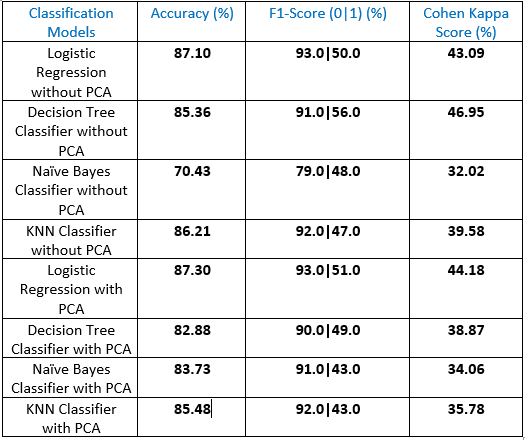

After applying PCA and before PCA - the highest metrics achieved by a classification model were by the Logistic Regression Model. Although, the most improved model based on the metrics was Naive Bayes Model, Logistic Regressions Metrics are still coming out to be the best and balanced among all the applied models. F1 score (we can see this model is showing the best results whilst classifying also for 0 and 1) , accuracy is also the highest after PCA (87.30% approximately), and the Cohen Kappa Score is also the highest(44.18%). 
Our best model, Logistic regression is called a Logit model as it works on logit function. It is a model used to predict the probability of an event occurring when there is prior data. It works with classification data(binary classed). Logit function gives a sigmoidal line and it gives the odds of probability. Sigmoid function is a function which converts all the values into a range of the probabilities(0 to 1).

As we know now, that among these models Logistic Regression Model is the best model, let's try to optimise the Logistic Regression Model even more by using grid search cv hyper parameter tuning.

In [230]:
LR = LogisticRegression(random_state=123)

In [235]:
params = {"C":[0.5,.7,.8,.9]}
Grid_LR = GridSearchCV(LR, cv = 10,param_grid=params)
Grid_LR.fit(xtrain,ytrain)
print('Best Parameters using Grid Search:', Grid_LR.best_params_)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

Best Parameters using Grid Search: {'C': 0.7}


C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [239]:
LogRegression =LogisticRegression(C=0.7)
LogRegression_Pred=LogRegression.fit(xtrain,ytrain).predict(xtest)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [240]:
accuracy_score(ytest,LogRegression_Pred)

0.8730738037307381

In [241]:
cohen_kappa_score(ytest,LogRegression_Pred)

0.44185309936987216

In [242]:
confusion_matrix(ytest,LogRegression_Pred)

array([[1993,   51],
       [ 262,  160]], dtype=int64)

In [243]:
# So even after applying grid search the metrics are staying the same.